# 2. Probability distributions

## 2.1.1 The beta distribution

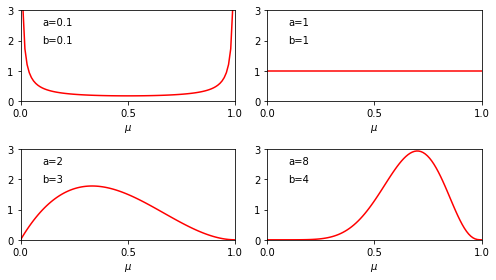

In [1]:
import numpy as np
from pd import *
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,1,100)
fig = plt.figure(figsize=(7,4))
for n,[a,b] in enumerate([[0.1,0.1],[1.,1.],[2.,3.],[8.,4.]],1):
    prob = Beta(a,b)
    ax = fig.add_subplot(2,2,n)
    ax.plot(x,prob.pdf(x),color='r')
    plt.xlabel(r"$\mu$")
    plt.xticks([0,0.5,1])
    plt.yticks(np.arange(0,4,1))
    plt.xlim(0,1)
    plt.ylim(0,3)
    plt.annotate("a={:.1g}".format(a), (0.1, 2.5))
    plt.annotate("b={:.1g}".format(b), (0.1, 1.9))
plt.tight_layout()
plt.show()

## 2.2.1 The Dirichlet distribution 

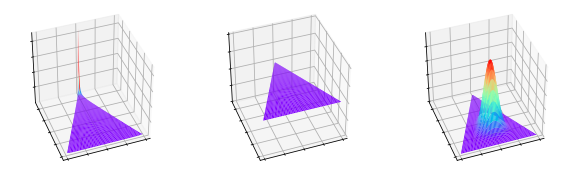

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pd.dirichlet import Dirichlet


'''triangle mesh grid (0,0)-(1,0)-(0,1)'''
X_test = np.array([[0.01*a*0.01*(100-b) for a in range(1, 100)] for b in range(1, 100)])
Y_test = np.array([[0.01*b] * 99 for b in range(1, 100)])
mesh_data = np.array([X_test.ravel(),Y_test.ravel(),1-X_test.ravel()-Y_test.ravel()]).T

X = np.array([x + (0.5 - np.average(x)) for x in X_test])
Y = Y_test * np.sqrt(3) / 2

fig = plt.figure(figsize=(10,3))
for i,alpha in enumerate([0.1,1,10],1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    prob = Dirichlet(np.repeat(alpha,3))
    Z = prob.pdf(mesh_data)
    ax.plot_surface(X,Y, Z.reshape(X.shape),cmap='rainbow')
    ax.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
    ax.view_init(elev=40, azim=250)
plt.show()


## 2.3. The Gaussian Distribution

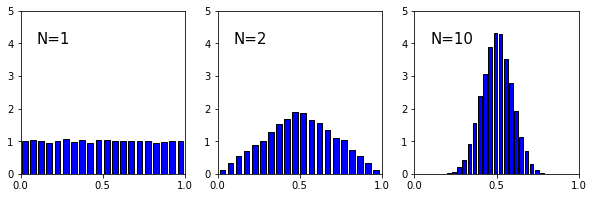

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pd.uniform import Uniform
np.random.seed()

prob = Uniform(low=0, high=1)
plt.figure(figsize=(10, 3))
size = 10000


for i,N in enumerate([1,2,10],1):
    plt.subplot(1, 3, i)
    plt.xlim(0, 1)
    plt.xticks([0,0.5,1])
    plt.ylim(0, 5)
    plt.annotate("N={}".format(N), (0.1, 4.),fontsize=15)
    sample = np.zeros(size)
    for _ in range(N):
        sample += prob.draw(size)
    plt.hist(sample/N, bins=20,color='b',density=True,rwidth = 0.7,edgecolor='black',lw=1.)
plt.show()

## 2.3.6 Bayesian inference for the Gaussian

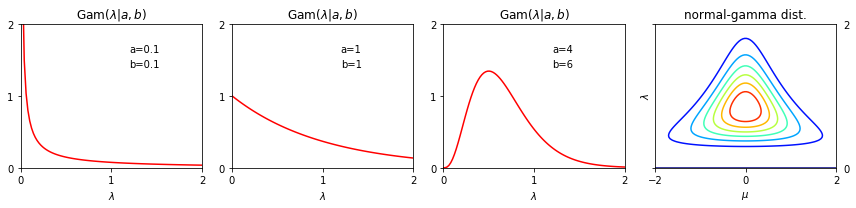

In [4]:
import numpy as np
from pd import *
import matplotlib.pyplot as plt

Font_size = 12
x = np.linspace(0,2,100)
fig = plt.figure(figsize=(12,3.))
# plot gamma distribution
for n,[a,b] in enumerate([[0.1,0.1],[1.,1.],[4.,6.]],1):
    prob = Gamma(a,b)
    ax = fig.add_subplot(1,4,n)
    ax.plot(x,prob.pdf(x),color='r')
    plt.title("Gam"+r"$(\lambda|a,b)$",fontsize=Font_size)
    plt.xlabel(r"$\lambda$")
    plt.xticks([0,0.5,1])
    plt.yticks(np.arange(0,4,1))
    plt.xlim(0,2)
    plt.ylim(0,2)
    plt.xticks(np.arange(0,3,1))
    plt.annotate("a={:.1g}".format(a), (1.2, 1.6))
    plt.annotate("b={:.1g}".format(b), (1.2, 1.4))


# plot nomal-gamma distribution
ax = fig.add_subplot(144)
mu,lamda = np.meshgrid(np.linspace(-2,2,100),np.linspace(0,2,100))
prob = Gamma(5,6)
Z = prob.norm_gamma(mu=mu.ravel(),x=lamda.ravel())
ax.contour(mu,lamda,Z.reshape(mu.shape),levels=np.linspace(min(Z),max(Z),8),cmap='jet')
ax.tick_params(labelleft=False,labelright=True)
plt.xticks([-2,0,2])
plt.yticks([0,2])
plt.xlim(-2,2)
plt.ylim(0,2)
plt.title("normal-gamma dist.",fontsize=Font_size)
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\lambda$")
plt.subplots_adjust()
plt.tight_layout()
plt.show()